In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)
plt.rcParams.update({'font.size': 15})

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

## Understanding 

In [3]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar =np.delete(d_stn_xar,edge)
d_stn_yar = np.delete(d_stn_yar,edge)

#print(np.size(d_stn_xar))
#print(edge)
# d_stn_y[41]

stn_ids = np.arange(0,580)
stn_ids_edgeout = np.delete(stn_ids,edge)

xs = pickle.load(open('./pkls/Xcoords_for571_stations.pkl', 'rb')) 
ys = pickle.load(open('./pkls/Ycoords_for571_stations.pkl', 'rb')) 


In [4]:
#load clustering

BIO_cl_2013 = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))  
BIO_cl_2014 = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))  
BIO_cl_2015 = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))  
BIO_cl_2016 = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))  

BIO_stns_cl_1_2013 = stn_ids_edgeout[BIO_cl_2013 == 1]
BIO_stns_cl_2_2013 = stn_ids_edgeout[BIO_cl_2013 == 2]
BIO_stns_cl_3_2013 = stn_ids_edgeout[BIO_cl_2013 == 3]
BIO_stns_cl_4_2013 = stn_ids_edgeout[BIO_cl_2013 == 4]
BIO_stns_cl_5_2013 = stn_ids_edgeout[BIO_cl_2013 == 5]
BIO_stns_cl_1_2014 = stn_ids_edgeout[BIO_cl_2014 == 1]
BIO_stns_cl_2_2014 = stn_ids_edgeout[BIO_cl_2014 == 2]
BIO_stns_cl_3_2014 = stn_ids_edgeout[BIO_cl_2014 == 3]
BIO_stns_cl_4_2014 = stn_ids_edgeout[BIO_cl_2014 == 4]
BIO_stns_cl_5_2014 = stn_ids_edgeout[BIO_cl_2014 == 5]
BIO_stns_cl_1_2015 = stn_ids_edgeout[BIO_cl_2015 == 1]
BIO_stns_cl_2_2015 = stn_ids_edgeout[BIO_cl_2015 == 2]
BIO_stns_cl_3_2015 = stn_ids_edgeout[BIO_cl_2015 == 3]
BIO_stns_cl_4_2015 = stn_ids_edgeout[BIO_cl_2015 == 4]
BIO_stns_cl_5_2015 = stn_ids_edgeout[BIO_cl_2015 == 5]
BIO_stns_cl_1_2016 = stn_ids_edgeout[BIO_cl_2016 == 1]
BIO_stns_cl_2_2016 = stn_ids_edgeout[BIO_cl_2016 == 2]
BIO_stns_cl_3_2016 = stn_ids_edgeout[BIO_cl_2016 == 3]
BIO_stns_cl_4_2016 = stn_ids_edgeout[BIO_cl_2016 == 4]
BIO_stns_cl_5_2016 = stn_ids_edgeout[BIO_cl_2016 == 5]


In [5]:
#load clustering

VED_cl_2013 = pickle.load(open('./pkls/VED_clno_5_2013_reass.pkl', 'rb'))  
VED_cl_2014 = pickle.load(open('./pkls/VED_clno_5_2014_reass.pkl', 'rb'))  
VED_cl_2015 = pickle.load(open('./pkls/VED_clno_5_2015_reass.pkl', 'rb'))  
VED_cl_2016 = pickle.load(open('./pkls/VED_clno_5_2016_reass.pkl', 'rb'))  

VED_stns_cl_1_2013 = stn_ids_edgeout[VED_cl_2013 == 1]
VED_stns_cl_2_2013 = stn_ids_edgeout[VED_cl_2013 == 2]
VED_stns_cl_3_2013 = stn_ids_edgeout[VED_cl_2013 == 3]
VED_stns_cl_4_2013 = stn_ids_edgeout[VED_cl_2013 == 4]
VED_stns_cl_5_2013 = stn_ids_edgeout[VED_cl_2013 == 5]
VED_stns_cl_1_2014 = stn_ids_edgeout[VED_cl_2014 == 1]
VED_stns_cl_2_2014 = stn_ids_edgeout[VED_cl_2014 == 2]
VED_stns_cl_3_2014 = stn_ids_edgeout[VED_cl_2014 == 3]
VED_stns_cl_4_2014 = stn_ids_edgeout[VED_cl_2014 == 4]
VED_stns_cl_5_2014 = stn_ids_edgeout[VED_cl_2014 == 5]
VED_stns_cl_1_2015 = stn_ids_edgeout[VED_cl_2015 == 1]
VED_stns_cl_2_2015 = stn_ids_edgeout[VED_cl_2015 == 2]
VED_stns_cl_3_2015 = stn_ids_edgeout[VED_cl_2015 == 3]
VED_stns_cl_4_2015 = stn_ids_edgeout[VED_cl_2015 == 4]
VED_stns_cl_5_2015 = stn_ids_edgeout[VED_cl_2015 == 5]
VED_stns_cl_1_2016 = stn_ids_edgeout[VED_cl_2016 == 1]
VED_stns_cl_2_2016 = stn_ids_edgeout[VED_cl_2016 == 2]
VED_stns_cl_3_2016 = stn_ids_edgeout[VED_cl_2016 == 3]
VED_stns_cl_4_2016 = stn_ids_edgeout[VED_cl_2016 == 4]
VED_stns_cl_5_2016 = stn_ids_edgeout[VED_cl_2016 == 5]

#load clustering

FWI_cl_2013 = pickle.load(open('./pkls/FWI_clno_5_2013_reass.pkl', 'rb'))  
FWI_cl_2014 = pickle.load(open('./pkls/FWI_clno_5_2014_reass.pkl', 'rb'))  
FWI_cl_2015 = pickle.load(open('./pkls/FWI_clno_5_2015_reass.pkl', 'rb'))  
FWI_cl_2016 = pickle.load(open('./pkls/FWI_clno_5_2016_reass.pkl', 'rb'))  

FWI_stns_cl_1_2013 = stn_ids_edgeout[FWI_cl_2013 == 1]
FWI_stns_cl_2_2013 = stn_ids_edgeout[FWI_cl_2013 == 2]
FWI_stns_cl_3_2013 = stn_ids_edgeout[FWI_cl_2013 == 3]
FWI_stns_cl_4_2013 = stn_ids_edgeout[FWI_cl_2013 == 4]
FWI_stns_cl_5_2013 = stn_ids_edgeout[FWI_cl_2013 == 5]
FWI_stns_cl_1_2014 = stn_ids_edgeout[FWI_cl_2014 == 1]
FWI_stns_cl_2_2014 = stn_ids_edgeout[FWI_cl_2014 == 2]
FWI_stns_cl_3_2014 = stn_ids_edgeout[FWI_cl_2014 == 3]
FWI_stns_cl_4_2014 = stn_ids_edgeout[FWI_cl_2014 == 4]
FWI_stns_cl_5_2014 = stn_ids_edgeout[FWI_cl_2014 == 5]
FWI_stns_cl_1_2015 = stn_ids_edgeout[FWI_cl_2015 == 1]
FWI_stns_cl_2_2015 = stn_ids_edgeout[FWI_cl_2015 == 2]
FWI_stns_cl_3_2015 = stn_ids_edgeout[FWI_cl_2015 == 3]
FWI_stns_cl_4_2015 = stn_ids_edgeout[FWI_cl_2015 == 4]
FWI_stns_cl_5_2015 = stn_ids_edgeout[FWI_cl_2015 == 5]
FWI_stns_cl_1_2016 = stn_ids_edgeout[FWI_cl_2016 == 1]
FWI_stns_cl_2_2016 = stn_ids_edgeout[FWI_cl_2016 == 2]
FWI_stns_cl_3_2016 = stn_ids_edgeout[FWI_cl_2016 == 3]
FWI_stns_cl_4_2016 = stn_ids_edgeout[FWI_cl_2016 == 4]
FWI_stns_cl_5_2016 = stn_ids_edgeout[FWI_cl_2016 == 5]


In [6]:
HALO_cl_2013 = pickle.load(open('./pkls/HALO_clno_5_2013_reass.pkl', 'rb'))  
HALO_cl_2014 = pickle.load(open('./pkls/HALO_clno_5_2014_reass.pkl', 'rb'))  
HALO_cl_2015 = pickle.load(open('./pkls/HALO_clno_5_2015_reass.pkl', 'rb'))  
HALO_cl_2016 = pickle.load(open('./pkls/HALO_clno_5_2016_reass.pkl', 'rb'))  

HALO_stns_cl_1_2013 = stn_ids_edgeout[HALO_cl_2013 == 1]
HALO_stns_cl_2_2013 = stn_ids_edgeout[HALO_cl_2013 == 2]
HALO_stns_cl_3_2013 = stn_ids_edgeout[HALO_cl_2013 == 3]
HALO_stns_cl_4_2013 = stn_ids_edgeout[HALO_cl_2013 == 4]
HALO_stns_cl_5_2013 = stn_ids_edgeout[HALO_cl_2013 == 5]
HALO_stns_cl_1_2014 = stn_ids_edgeout[HALO_cl_2014 == 1]
HALO_stns_cl_2_2014 = stn_ids_edgeout[HALO_cl_2014 == 2]
HALO_stns_cl_3_2014 = stn_ids_edgeout[HALO_cl_2014 == 3]
HALO_stns_cl_4_2014 = stn_ids_edgeout[HALO_cl_2014 == 4]
HALO_stns_cl_5_2014 = stn_ids_edgeout[HALO_cl_2014 == 5]
HALO_stns_cl_1_2015 = stn_ids_edgeout[HALO_cl_2015 == 1]
HALO_stns_cl_2_2015 = stn_ids_edgeout[HALO_cl_2015 == 2]
HALO_stns_cl_3_2015 = stn_ids_edgeout[HALO_cl_2015 == 3]
HALO_stns_cl_4_2015 = stn_ids_edgeout[HALO_cl_2015 == 4]
HALO_stns_cl_5_2015 = stn_ids_edgeout[HALO_cl_2015 == 5]
HALO_stns_cl_1_2016 = stn_ids_edgeout[HALO_cl_2016 == 1]
HALO_stns_cl_2_2016 = stn_ids_edgeout[HALO_cl_2016 == 2]
HALO_stns_cl_3_2016 = stn_ids_edgeout[HALO_cl_2016 == 3]
HALO_stns_cl_4_2016 = stn_ids_edgeout[HALO_cl_2016 == 4]
HALO_stns_cl_5_2016 = stn_ids_edgeout[HALO_cl_2016 == 5]

WIND_cl_2013 = pickle.load(open('./pkls/WIND_clno_5_2013_reass.pkl', 'rb'))  
WIND_cl_2014 = pickle.load(open('./pkls/WIND_clno_5_2014_reass.pkl', 'rb'))  
WIND_cl_2015 = pickle.load(open('./pkls/WIND_clno_5_2015_reass.pkl', 'rb'))  
WIND_cl_2016 = pickle.load(open('./pkls/WIND_clno_5_2016_reass.pkl', 'rb'))  

WIND_stns_cl_1_2013 = stn_ids_edgeout[WIND_cl_2013 == 1]
WIND_stns_cl_2_2013 = stn_ids_edgeout[WIND_cl_2013 == 2]
WIND_stns_cl_3_2013 = stn_ids_edgeout[WIND_cl_2013 == 3]
WIND_stns_cl_4_2013 = stn_ids_edgeout[WIND_cl_2013 == 4]
WIND_stns_cl_5_2013 = stn_ids_edgeout[WIND_cl_2013 == 5]
WIND_stns_cl_1_2014 = stn_ids_edgeout[WIND_cl_2014 == 1]
WIND_stns_cl_2_2014 = stn_ids_edgeout[WIND_cl_2014 == 2]
WIND_stns_cl_3_2014 = stn_ids_edgeout[WIND_cl_2014 == 3]
WIND_stns_cl_4_2014 = stn_ids_edgeout[WIND_cl_2014 == 4]
WIND_stns_cl_5_2014 = stn_ids_edgeout[WIND_cl_2014 == 5]
WIND_stns_cl_1_2015 = stn_ids_edgeout[WIND_cl_2015 == 1]
WIND_stns_cl_2_2015 = stn_ids_edgeout[WIND_cl_2015 == 2]
WIND_stns_cl_3_2015 = stn_ids_edgeout[WIND_cl_2015 == 3]
WIND_stns_cl_4_2015 = stn_ids_edgeout[WIND_cl_2015 == 4]
WIND_stns_cl_5_2015 = stn_ids_edgeout[WIND_cl_2015 == 5]
WIND_stns_cl_1_2016 = stn_ids_edgeout[WIND_cl_2016 == 1]
WIND_stns_cl_2_2016 = stn_ids_edgeout[WIND_cl_2016 == 2]
WIND_stns_cl_3_2016 = stn_ids_edgeout[WIND_cl_2016 == 3]
WIND_stns_cl_4_2016 = stn_ids_edgeout[WIND_cl_2016 == 4]
WIND_stns_cl_5_2016 = stn_ids_edgeout[WIND_cl_2016 == 5]

In [7]:
# for col in hplc_obs.columns: 
#     print(col) 


In [8]:
BIO_overlaps_cl_1 = np.zeros([4,4])
ars = [BIO_stns_cl_1_2013,BIO_stns_cl_1_2014,BIO_stns_cl_1_2015,BIO_stns_cl_1_2016]
for i in range(0,4):
    BIO_overlaps_cl_1[0,i] = (len(np.intersect1d(BIO_stns_cl_1_2013,ars[i]))/len(BIO_stns_cl_1_2013))
for i in range(0,4):
    BIO_overlaps_cl_1[1,i] = (len(np.intersect1d(BIO_stns_cl_1_2014,ars[i]))/len(BIO_stns_cl_1_2014))
for i in range(0,4):
    BIO_overlaps_cl_1[2,i] = (len(np.intersect1d(BIO_stns_cl_1_2015,ars[i]))/len(BIO_stns_cl_1_2015))
for i in range(0,4):
    BIO_overlaps_cl_1[3,i] = (len(np.intersect1d(BIO_stns_cl_1_2016,ars[i]))/len(BIO_stns_cl_1_2016))
print('cl_1')    
for i in range(0,4):
    BIO_overlaps_cl_1[i,i] = np.nan
print(BIO_overlaps_cl_1)
print(np.nanmean(BIO_overlaps_cl_1))
#np.where(BIO_stns_cl_3_2013==BIO_stns_cl_3_2014)
BIO_overlaps_cl_2 = np.zeros([4,4])
ars = [BIO_stns_cl_2_2013,BIO_stns_cl_2_2014,BIO_stns_cl_2_2015,BIO_stns_cl_2_2016]
for i in range(0,4):
    BIO_overlaps_cl_2[0,i] = (len(np.intersect1d(BIO_stns_cl_2_2013,ars[i]))/len(BIO_stns_cl_2_2013))
for i in range(0,4):
    BIO_overlaps_cl_2[1,i] = (len(np.intersect1d(BIO_stns_cl_2_2014,ars[i]))/len(BIO_stns_cl_2_2014))
for i in range(0,4):
    BIO_overlaps_cl_2[2,i] = (len(np.intersect1d(BIO_stns_cl_2_2015,ars[i]))/len(BIO_stns_cl_2_2015))
for i in range(0,4):
    BIO_overlaps_cl_2[3,i] = (len(np.intersect1d(BIO_stns_cl_2_2016,ars[i]))/len(BIO_stns_cl_2_2016))
for i in range(0,4):
    BIO_overlaps_cl_2[i,i] = np.nan

print('cl_2')    
print(BIO_overlaps_cl_2)
print(np.nanmean(BIO_overlaps_cl_2))
BIO_overlaps_cl_3 = np.zeros([4,4])
ars = [BIO_stns_cl_3_2013,BIO_stns_cl_3_2014,BIO_stns_cl_3_2015,BIO_stns_cl_3_2016]
for i in range(0,4):
    BIO_overlaps_cl_3[0,i] = (len(np.intersect1d(BIO_stns_cl_3_2013,ars[i]))/len(BIO_stns_cl_3_2013))
for i in range(0,4):
    BIO_overlaps_cl_3[1,i] = (len(np.intersect1d(BIO_stns_cl_3_2014,ars[i]))/len(BIO_stns_cl_3_2014))
for i in range(0,4):
    BIO_overlaps_cl_3[2,i] = (len(np.intersect1d(BIO_stns_cl_3_2015,ars[i]))/len(BIO_stns_cl_3_2015))
for i in range(0,4):
    BIO_overlaps_cl_3[3,i] = (len(np.intersect1d(BIO_stns_cl_3_2016,ars[i]))/len(BIO_stns_cl_3_2016))
for i in range(0,4):
    BIO_overlaps_cl_3[i,i] = np.nan
print('cl 3')    
print(BIO_overlaps_cl_3)
print(np.nanmean(BIO_overlaps_cl_3))

BIO_overlaps_cl_4 = np.zeros([4,4])
ars = [BIO_stns_cl_4_2013,BIO_stns_cl_4_2014,BIO_stns_cl_4_2015,BIO_stns_cl_4_2016]
for i in range(0,4):
    BIO_overlaps_cl_4[0,i] = (len(np.intersect1d(BIO_stns_cl_4_2013,ars[i]))/len(BIO_stns_cl_4_2013))
for i in range(0,4):
    BIO_overlaps_cl_4[1,i] = (len(np.intersect1d(BIO_stns_cl_4_2014,ars[i]))/len(BIO_stns_cl_4_2014))
for i in range(0,4):
    BIO_overlaps_cl_4[2,i] = (len(np.intersect1d(BIO_stns_cl_4_2015,ars[i]))/len(BIO_stns_cl_4_2015))
for i in range(0,4):
    BIO_overlaps_cl_4[3,i] = (len(np.intersect1d(BIO_stns_cl_4_2016,ars[i]))/len(BIO_stns_cl_4_2016))
print('cl 4') 
for i in range(0,4):
    BIO_overlaps_cl_4[i,i] = np.nan
print(BIO_overlaps_cl_4)
print(np.nanmean(BIO_overlaps_cl_4))

BIO_overlaps_cl_5 = np.zeros([4,4])
ars = [BIO_stns_cl_5_2013,BIO_stns_cl_5_2014,BIO_stns_cl_5_2015,BIO_stns_cl_5_2016]
for i in range(0,4):
    BIO_overlaps_cl_5[0,i] = (len(np.intersect1d(BIO_stns_cl_5_2013,ars[i]))/len(BIO_stns_cl_5_2013))
for i in range(0,4):
    BIO_overlaps_cl_5[1,i] = (len(np.intersect1d(BIO_stns_cl_5_2014,ars[i]))/len(BIO_stns_cl_5_2014))
for i in range(0,4):
    BIO_overlaps_cl_5[2,i] = (len(np.intersect1d(BIO_stns_cl_5_2015,ars[i]))/len(BIO_stns_cl_5_2015))
for i in range(0,4):
    BIO_overlaps_cl_5[3,i] = (len(np.intersect1d(BIO_stns_cl_5_2016,ars[i]))/len(BIO_stns_cl_5_2016))
print('cl 5')
for i in range(0,4):
    BIO_overlaps_cl_5[i,i] = np.nan
print(BIO_overlaps_cl_5)
print(np.nanmean(BIO_overlaps_cl_5))

cl_1
[[       nan 1.         1.         0.77272727]
 [1.                nan 1.         0.77272727]
 [0.91666667 0.91666667        nan 0.70833333]
 [1.         1.         1.                nan]]
0.9239267676767676
cl_2
[[       nan 0.3625     0.375      0.8       ]
 [1.                nan 1.         1.        ]
 [1.         0.96666667        nan 1.        ]
 [0.7032967  0.31868132 0.32967033        nan]]
0.7379845848595847
cl 3
[[       nan 0.98449612 0.86434109 0.81395349]
 [0.8410596         nan 0.87086093 0.7384106 ]
 [0.81090909 0.95636364        nan 0.80727273]
 [0.91304348 0.96956522 0.96521739        nan]]
0.8779577804170174
cl 4
[[       nan 0.83783784 0.83783784 0.86486486]
 [0.79487179        nan 0.76923077 0.76923077]
 [0.46969697 0.45454545        nan 0.93939394]
 [0.42666667 0.4        0.82666667        nan]]
0.6992369642369641
cl 5
[[       nan 0.97701149 0.95402299 0.87356322]
 [0.94972067        nan 0.91620112 0.82681564]
 [0.94318182 0.93181818        nan 0.85795455]
 [

In [9]:
print('HALO')
HALO_overlaps_cl_1 = np.zeros([4,4])
ars = [HALO_stns_cl_1_2013,HALO_stns_cl_1_2014,HALO_stns_cl_1_2015,HALO_stns_cl_1_2016]
for i in range(0,4):
    HALO_overlaps_cl_1[0,i] = (len(np.intersect1d(HALO_stns_cl_1_2013,ars[i]))/len(HALO_stns_cl_1_2013))
for i in range(0,4):
    HALO_overlaps_cl_1[1,i] = (len(np.intersect1d(HALO_stns_cl_1_2014,ars[i]))/len(HALO_stns_cl_1_2014))
for i in range(0,4):
    HALO_overlaps_cl_1[2,i] = (len(np.intersect1d(HALO_stns_cl_1_2015,ars[i]))/len(HALO_stns_cl_1_2015))
for i in range(0,4):
    HALO_overlaps_cl_1[3,i] = (len(np.intersect1d(HALO_stns_cl_1_2016,ars[i]))/len(HALO_stns_cl_1_2016))
print('cl_1')    
for i in range(0,4):
    HALO_overlaps_cl_1[i,i] = np.nan
print(HALO_overlaps_cl_1)
print(np.nanmean(HALO_overlaps_cl_1))
#np.where(HALO_stns_cl_3_2013==HALO_stns_cl_3_2014)
HALO_overlaps_cl_2 = np.zeros([4,4])
ars = [HALO_stns_cl_2_2013,HALO_stns_cl_2_2014,HALO_stns_cl_2_2015,HALO_stns_cl_2_2016]
for i in range(0,4):
    HALO_overlaps_cl_2[0,i] = (len(np.intersect1d(HALO_stns_cl_2_2013,ars[i]))/len(HALO_stns_cl_2_2013))
for i in range(0,4):
    HALO_overlaps_cl_2[1,i] = (len(np.intersect1d(HALO_stns_cl_2_2014,ars[i]))/len(HALO_stns_cl_2_2014))
for i in range(0,4):
    HALO_overlaps_cl_2[2,i] = (len(np.intersect1d(HALO_stns_cl_2_2015,ars[i]))/len(HALO_stns_cl_2_2015))
for i in range(0,4):
    HALO_overlaps_cl_2[3,i] = (len(np.intersect1d(HALO_stns_cl_2_2016,ars[i]))/len(HALO_stns_cl_2_2016))
for i in range(0,4):
    HALO_overlaps_cl_2[i,i] = np.nan

print('cl_2')    
print(HALO_overlaps_cl_2)
print(np.nanmean(HALO_overlaps_cl_2))
HALO_overlaps_cl_3 = np.zeros([4,4])
ars = [HALO_stns_cl_3_2013,HALO_stns_cl_3_2014,HALO_stns_cl_3_2015,HALO_stns_cl_3_2016]
for i in range(0,4):
    HALO_overlaps_cl_3[0,i] = (len(np.intersect1d(HALO_stns_cl_3_2013,ars[i]))/len(HALO_stns_cl_3_2013))
for i in range(0,4):
    HALO_overlaps_cl_3[1,i] = (len(np.intersect1d(HALO_stns_cl_3_2014,ars[i]))/len(HALO_stns_cl_3_2014))
for i in range(0,4):
    HALO_overlaps_cl_3[2,i] = (len(np.intersect1d(HALO_stns_cl_3_2015,ars[i]))/len(HALO_stns_cl_3_2015))
for i in range(0,4):
    HALO_overlaps_cl_3[3,i] = (len(np.intersect1d(HALO_stns_cl_3_2016,ars[i]))/len(HALO_stns_cl_3_2016))
for i in range(0,4):
    HALO_overlaps_cl_3[i,i] = np.nan
print('cl 3')    
print(HALO_overlaps_cl_3)
print(np.nanmean(HALO_overlaps_cl_3))

HALO_overlaps_cl_4 = np.zeros([4,4])
ars = [HALO_stns_cl_4_2013,HALO_stns_cl_4_2014,HALO_stns_cl_4_2015,HALO_stns_cl_4_2016]
for i in range(0,4):
    HALO_overlaps_cl_4[0,i] = (len(np.intersect1d(HALO_stns_cl_4_2013,ars[i]))/len(HALO_stns_cl_4_2013))
for i in range(0,4):
    HALO_overlaps_cl_4[1,i] = (len(np.intersect1d(HALO_stns_cl_4_2014,ars[i]))/len(HALO_stns_cl_4_2014))
for i in range(0,4):
    HALO_overlaps_cl_4[2,i] = (len(np.intersect1d(HALO_stns_cl_4_2015,ars[i]))/len(HALO_stns_cl_4_2015))
for i in range(0,4):
    HALO_overlaps_cl_4[3,i] = (len(np.intersect1d(HALO_stns_cl_4_2016,ars[i]))/len(HALO_stns_cl_4_2016))
print('cl 4') 
for i in range(0,4):
    HALO_overlaps_cl_4[i,i] = np.nan
print(HALO_overlaps_cl_4)
print(np.nanmean(HALO_overlaps_cl_4))

HALO_overlaps_cl_5 = np.zeros([4,4])
ars = [HALO_stns_cl_5_2013,HALO_stns_cl_5_2014,HALO_stns_cl_5_2015,HALO_stns_cl_5_2016]
for i in range(0,4):
    HALO_overlaps_cl_5[0,i] = (len(np.intersect1d(HALO_stns_cl_5_2013,ars[i]))/len(HALO_stns_cl_5_2013))
for i in range(0,4):
    HALO_overlaps_cl_5[1,i] = (len(np.intersect1d(HALO_stns_cl_5_2014,ars[i]))/len(HALO_stns_cl_5_2014))
for i in range(0,4):
    HALO_overlaps_cl_5[2,i] = (len(np.intersect1d(HALO_stns_cl_5_2015,ars[i]))/len(HALO_stns_cl_5_2015))
for i in range(0,4):
    HALO_overlaps_cl_5[3,i] = (len(np.intersect1d(HALO_stns_cl_5_2016,ars[i]))/len(HALO_stns_cl_5_2016))
print('cl 5')
for i in range(0,4):
    HALO_overlaps_cl_5[i,i] = np.nan
print(HALO_overlaps_cl_5)
print(np.nanmean(HALO_overlaps_cl_5))

HALO
cl_1
[[       nan 0.47727273 0.59090909 0.43181818]
 [0.80769231        nan 0.53846154 0.26923077]
 [0.89655172 0.48275862        nan 0.68965517]
 [0.95       0.35       1.                nan]]
0.6236958443854995
cl_2
[[       nan 0.71794872 0.51282051 0.        ]
 [1.                nan 0.53571429 0.        ]
 [1.         0.75              nan 0.        ]
 [0.         0.         0.                nan]]
0.37637362637362637
cl 3
[[       nan 0.97043011 0.9516129  0.9516129 ]
 [0.97304582        nan 0.95687332 0.9541779 ]
 [0.96457766 0.96730245        nan 0.95640327]
 [0.97520661 0.97520661 0.96694215        nan]]
0.9636159749721956
cl 4
[[       nan 0.86597938 0.8556701  0.51546392]
 [0.84848485        nan 0.87878788 0.53535354]
 [0.74107143 0.77678571        nan 0.47321429]
 [0.79365079 0.84126984 0.84126984        nan]]
0.7472501307875019
cl 5
[[       nan 1.         0.94736842 1.        ]
 [0.40425532        nan 0.44680851 0.55319149]
 [0.41860465 0.48837209        nan 0.953488

In [10]:
print('FWI')
FWI_overlaps_cl_1 = np.zeros([4,4])
ars = [FWI_stns_cl_1_2013,FWI_stns_cl_1_2014,FWI_stns_cl_1_2015,FWI_stns_cl_1_2016]
for i in range(0,4):
    FWI_overlaps_cl_1[0,i] = (len(np.intersect1d(FWI_stns_cl_1_2013,ars[i]))/len(FWI_stns_cl_1_2013))
for i in range(0,4):
    FWI_overlaps_cl_1[1,i] = (len(np.intersect1d(FWI_stns_cl_1_2014,ars[i]))/len(FWI_stns_cl_1_2014))
for i in range(0,4):
    FWI_overlaps_cl_1[2,i] = (len(np.intersect1d(FWI_stns_cl_1_2015,ars[i]))/len(FWI_stns_cl_1_2015))
for i in range(0,4):
    FWI_overlaps_cl_1[3,i] = (len(np.intersect1d(FWI_stns_cl_1_2016,ars[i]))/len(FWI_stns_cl_1_2016))
print('cl_1')    
for i in range(0,4):
    FWI_overlaps_cl_1[i,i] = np.nan
print(FWI_overlaps_cl_1)
print(np.nanmean(FWI_overlaps_cl_1))
#np.where(FWI_stns_cl_3_2013==FWI_stns_cl_3_2014)
FWI_overlaps_cl_2 = np.zeros([4,4])
ars = [FWI_stns_cl_2_2013,FWI_stns_cl_2_2014,FWI_stns_cl_2_2015,FWI_stns_cl_2_2016]
for i in range(0,4):
    FWI_overlaps_cl_2[0,i] = (len(np.intersect1d(FWI_stns_cl_2_2013,ars[i]))/len(FWI_stns_cl_2_2013))
for i in range(0,4):
    FWI_overlaps_cl_2[1,i] = (len(np.intersect1d(FWI_stns_cl_2_2014,ars[i]))/len(FWI_stns_cl_2_2014))
for i in range(0,4):
    FWI_overlaps_cl_2[2,i] = (len(np.intersect1d(FWI_stns_cl_2_2015,ars[i]))/len(FWI_stns_cl_2_2015))
for i in range(0,4):
    FWI_overlaps_cl_2[3,i] = (len(np.intersect1d(FWI_stns_cl_2_2016,ars[i]))/len(FWI_stns_cl_2_2016))
for i in range(0,4):
    FWI_overlaps_cl_2[i,i] = np.nan

print('cl_2')    
print(FWI_overlaps_cl_2)
print(np.nanmean(FWI_overlaps_cl_2))
FWI_overlaps_cl_3 = np.zeros([4,4])
ars = [FWI_stns_cl_3_2013,FWI_stns_cl_3_2014,FWI_stns_cl_3_2015,FWI_stns_cl_3_2016]
for i in range(0,4):
    FWI_overlaps_cl_3[0,i] = (len(np.intersect1d(FWI_stns_cl_3_2013,ars[i]))/len(FWI_stns_cl_3_2013))
for i in range(0,4):
    FWI_overlaps_cl_3[1,i] = (len(np.intersect1d(FWI_stns_cl_3_2014,ars[i]))/len(FWI_stns_cl_3_2014))
for i in range(0,4):
    FWI_overlaps_cl_3[2,i] = (len(np.intersect1d(FWI_stns_cl_3_2015,ars[i]))/len(FWI_stns_cl_3_2015))
for i in range(0,4):
    FWI_overlaps_cl_3[3,i] = (len(np.intersect1d(FWI_stns_cl_3_2016,ars[i]))/len(FWI_stns_cl_3_2016))
for i in range(0,4):
    FWI_overlaps_cl_3[i,i] = np.nan
print('cl 3')    
print(FWI_overlaps_cl_3)
print(np.nanmean(FWI_overlaps_cl_3))

FWI_overlaps_cl_4 = np.zeros([4,4])
ars = [FWI_stns_cl_4_2013,FWI_stns_cl_4_2014,FWI_stns_cl_4_2015,FWI_stns_cl_4_2016]
for i in range(0,4):
    FWI_overlaps_cl_4[0,i] = (len(np.intersect1d(FWI_stns_cl_4_2013,ars[i]))/len(FWI_stns_cl_4_2013))
for i in range(0,4):
    FWI_overlaps_cl_4[1,i] = (len(np.intersect1d(FWI_stns_cl_4_2014,ars[i]))/len(FWI_stns_cl_4_2014))
for i in range(0,4):
    FWI_overlaps_cl_4[2,i] = (len(np.intersect1d(FWI_stns_cl_4_2015,ars[i]))/len(FWI_stns_cl_4_2015))
for i in range(0,4):
    FWI_overlaps_cl_4[3,i] = (len(np.intersect1d(FWI_stns_cl_4_2016,ars[i]))/len(FWI_stns_cl_4_2016))
print('cl 4') 
for i in range(0,4):
    FWI_overlaps_cl_4[i,i] = np.nan
print(FWI_overlaps_cl_4)
print(np.nanmean(FWI_overlaps_cl_4))

FWI_overlaps_cl_5 = np.zeros([4,4])
ars = [FWI_stns_cl_5_2013,FWI_stns_cl_5_2014,FWI_stns_cl_5_2015,FWI_stns_cl_5_2016]
for i in range(0,4):
    FWI_overlaps_cl_5[0,i] = (len(np.intersect1d(FWI_stns_cl_5_2013,ars[i]))/len(FWI_stns_cl_5_2013))
for i in range(0,4):
    FWI_overlaps_cl_5[1,i] = (len(np.intersect1d(FWI_stns_cl_5_2014,ars[i]))/len(FWI_stns_cl_5_2014))
for i in range(0,4):
    FWI_overlaps_cl_5[2,i] = (len(np.intersect1d(FWI_stns_cl_5_2015,ars[i]))/len(FWI_stns_cl_5_2015))
for i in range(0,4):
    FWI_overlaps_cl_5[3,i] = (len(np.intersect1d(FWI_stns_cl_5_2016,ars[i]))/len(FWI_stns_cl_5_2016))
print('cl 5')
for i in range(0,4):
    FWI_overlaps_cl_5[i,i] = np.nan
print(FWI_overlaps_cl_5)
print(np.nanmean(FWI_overlaps_cl_5))

FWI
cl_1
[[       nan 0.62068966 0.62068966 0.5862069 ]
 [1.                nan 1.         0.83333333]
 [1.         1.                nan 0.83333333]
 [1.         0.88235294 0.88235294        nan]]
0.85491322965968
cl_2
[[       nan 0.76315789 0.63157895 0.15789474]
 [0.60416667        nan 0.6875     0.27083333]
 [0.61538462 0.84615385        nan 0.38461538]
 [0.33333333 0.72222222 0.83333333        nan]]
0.5708478594991754
cl 3
[[       nan 0.83898305 0.94915254 0.50847458]
 [0.9               nan 0.94545455 0.54545455]
 [0.77241379 0.71724138        nan 0.48965517]
 [0.65934066 0.65934066 0.78021978        nan]]
0.7304775586774418
cl 4
[[       nan 0.98245614 0.88304094 0.08187135]
 [0.84              nan 0.81       0.105     ]
 [0.92073171 0.98780488        nan 0.        ]
 [0.1971831  0.29577465 0.                nan]]
0.5086552294081131
cl 5
[[       nan 0.90232558 0.94883721 1.        ]
 [0.99487179        nan 0.98974359 1.        ]
 [0.99512195 0.94146341        nan 1.        ]


In [11]:
print('VED')
VED_overlaps_cl_1 = np.zeros([4,4])
ars = [VED_stns_cl_1_2013,VED_stns_cl_1_2014,VED_stns_cl_1_2015,VED_stns_cl_1_2016]
for i in range(0,4):
    VED_overlaps_cl_1[0,i] = (len(np.intersect1d(VED_stns_cl_1_2013,ars[i]))/len(VED_stns_cl_1_2013))
for i in range(0,4):
    VED_overlaps_cl_1[1,i] = (len(np.intersect1d(VED_stns_cl_1_2014,ars[i]))/len(VED_stns_cl_1_2014))
for i in range(0,4):
    VED_overlaps_cl_1[2,i] = (len(np.intersect1d(VED_stns_cl_1_2015,ars[i]))/len(VED_stns_cl_1_2015))
for i in range(0,4):
    VED_overlaps_cl_1[3,i] = (len(np.intersect1d(VED_stns_cl_1_2016,ars[i]))/len(VED_stns_cl_1_2016))
print('cl_1')    
for i in range(0,4):
    VED_overlaps_cl_1[i,i] = np.nan
print(VED_overlaps_cl_1)
print(np.nanmean(VED_overlaps_cl_1))
#np.where(VED_stns_cl_3_2013==VED_stns_cl_3_2014)
VED_overlaps_cl_2 = np.zeros([4,4])
ars = [VED_stns_cl_2_2013,VED_stns_cl_2_2014,VED_stns_cl_2_2015,VED_stns_cl_2_2016]
for i in range(0,4):
    VED_overlaps_cl_2[0,i] = (len(np.intersect1d(VED_stns_cl_2_2013,ars[i]))/len(VED_stns_cl_2_2013))
for i in range(0,4):
    VED_overlaps_cl_2[1,i] = (len(np.intersect1d(VED_stns_cl_2_2014,ars[i]))/len(VED_stns_cl_2_2014))
for i in range(0,4):
    VED_overlaps_cl_2[2,i] = (len(np.intersect1d(VED_stns_cl_2_2015,ars[i]))/len(VED_stns_cl_2_2015))
for i in range(0,4):
    VED_overlaps_cl_2[3,i] = (len(np.intersect1d(VED_stns_cl_2_2016,ars[i]))/len(VED_stns_cl_2_2016))
for i in range(0,4):
    VED_overlaps_cl_2[i,i] = np.nan

print('cl_2')    
print(VED_overlaps_cl_2)
print(np.nanmean(VED_overlaps_cl_2))
VED_overlaps_cl_3 = np.zeros([4,4])
ars = [VED_stns_cl_3_2013,VED_stns_cl_3_2014,VED_stns_cl_3_2015,VED_stns_cl_3_2016]
for i in range(0,4):
    VED_overlaps_cl_3[0,i] = (len(np.intersect1d(VED_stns_cl_3_2013,ars[i]))/len(VED_stns_cl_3_2013))
for i in range(0,4):
    VED_overlaps_cl_3[1,i] = (len(np.intersect1d(VED_stns_cl_3_2014,ars[i]))/len(VED_stns_cl_3_2014))
for i in range(0,4):
    VED_overlaps_cl_3[2,i] = (len(np.intersect1d(VED_stns_cl_3_2015,ars[i]))/len(VED_stns_cl_3_2015))
for i in range(0,4):
    VED_overlaps_cl_3[3,i] = (len(np.intersect1d(VED_stns_cl_3_2016,ars[i]))/len(VED_stns_cl_3_2016))
for i in range(0,4):
    VED_overlaps_cl_3[i,i] = np.nan
print('cl 3')    
print(VED_overlaps_cl_3)
print(np.nanmean(VED_overlaps_cl_3))

VED_overlaps_cl_4 = np.zeros([4,4])
ars = [VED_stns_cl_4_2013,VED_stns_cl_4_2014,VED_stns_cl_4_2015,VED_stns_cl_4_2016]
for i in range(0,4):
    VED_overlaps_cl_4[0,i] = (len(np.intersect1d(VED_stns_cl_4_2013,ars[i]))/len(VED_stns_cl_4_2013))
for i in range(0,4):
    VED_overlaps_cl_4[1,i] = (len(np.intersect1d(VED_stns_cl_4_2014,ars[i]))/len(VED_stns_cl_4_2014))
for i in range(0,4):
    VED_overlaps_cl_4[2,i] = (len(np.intersect1d(VED_stns_cl_4_2015,ars[i]))/len(VED_stns_cl_4_2015))
for i in range(0,4):
    VED_overlaps_cl_4[3,i] = (len(np.intersect1d(VED_stns_cl_4_2016,ars[i]))/len(VED_stns_cl_4_2016))
print('cl 4') 
for i in range(0,4):
    VED_overlaps_cl_4[i,i] = np.nan
print(VED_overlaps_cl_4)
print(np.nanmean(VED_overlaps_cl_4))

VED_overlaps_cl_5 = np.zeros([4,4])
ars = [VED_stns_cl_5_2013,VED_stns_cl_5_2014,VED_stns_cl_5_2015,VED_stns_cl_5_2016]
for i in range(0,4):
    VED_overlaps_cl_5[0,i] = (len(np.intersect1d(VED_stns_cl_5_2013,ars[i]))/len(VED_stns_cl_5_2013))
for i in range(0,4):
    VED_overlaps_cl_5[1,i] = (len(np.intersect1d(VED_stns_cl_5_2014,ars[i]))/len(VED_stns_cl_5_2014))
for i in range(0,4):
    VED_overlaps_cl_5[2,i] = (len(np.intersect1d(VED_stns_cl_5_2015,ars[i]))/len(VED_stns_cl_5_2015))
for i in range(0,4):
    VED_overlaps_cl_5[3,i] = (len(np.intersect1d(VED_stns_cl_5_2016,ars[i]))/len(VED_stns_cl_5_2016))
print('cl 5')
for i in range(0,4):
    VED_overlaps_cl_5[i,i] = np.nan
print(VED_overlaps_cl_5)
print(np.nanmean(VED_overlaps_cl_5))

VED
cl_1
[[       nan 0.4        0.53333333 0.86666667]
 [0.57142857        nan 0.47619048 0.42857143]
 [1.         0.625             nan 0.875     ]
 [0.89655172 0.31034483 0.48275862        nan]]
0.6221538040503557
cl_2
[[       nan 0.         1.         1.        ]
 [0.                nan 0.         0.        ]
 [0.9        0.                nan 1.        ]
 [0.75       0.         0.83333333        nan]]
0.45694444444444443
cl 3
[[       nan 1.         1.         1.        ]
 [0.92893401        nan 1.         0.99238579]
 [0.7625     0.82083333        nan 0.84791667]
 [0.8992629  0.96068796 1.                nan]]
0.9343767214087645
cl 4
[[nan  1.  1.  1.]
 [ 1. nan  1.  1.]
 [ 1.  1. nan  1.]
 [ 1.  1.  1. nan]]
1.0
cl 5
[[       nan 0.82208589 0.3006135  0.73006135]
 [1.                nan 0.35820896 0.86567164]
 [0.79032258 0.77419355        nan 0.75806452]
 [0.99166667 0.96666667 0.39166667        nan]]
0.7291018315310446


In [12]:
print('WIND')
WIND_overlaps_cl_1 = np.zeros([4,4])
ars = [WIND_stns_cl_1_2013,WIND_stns_cl_1_2014,WIND_stns_cl_1_2015,WIND_stns_cl_1_2016]
for i in range(0,4):
    WIND_overlaps_cl_1[0,i] = (len(np.intersect1d(WIND_stns_cl_1_2013,ars[i]))/len(WIND_stns_cl_1_2013))
for i in range(0,4):
    WIND_overlaps_cl_1[1,i] = (len(np.intersect1d(WIND_stns_cl_1_2014,ars[i]))/len(WIND_stns_cl_1_2014))
for i in range(0,4):
    WIND_overlaps_cl_1[2,i] = (len(np.intersect1d(WIND_stns_cl_1_2015,ars[i]))/len(WIND_stns_cl_1_2015))
for i in range(0,4):
    WIND_overlaps_cl_1[3,i] = (len(np.intersect1d(WIND_stns_cl_1_2016,ars[i]))/len(WIND_stns_cl_1_2016))
print('cl_1')    
for i in range(0,4):
    WIND_overlaps_cl_1[i,i] = np.nan
print(WIND_overlaps_cl_1)
print(np.nanmean(WIND_overlaps_cl_1))
#np.where(WIND_stns_cl_3_2013==WIND_stns_cl_3_2014)
WIND_overlaps_cl_2 = np.zeros([4,4])
ars = [WIND_stns_cl_2_2013,WIND_stns_cl_2_2014,WIND_stns_cl_2_2015,WIND_stns_cl_2_2016]
for i in range(0,4):
    WIND_overlaps_cl_2[0,i] = (len(np.intersect1d(WIND_stns_cl_2_2013,ars[i]))/len(WIND_stns_cl_2_2013))
for i in range(0,4):
    WIND_overlaps_cl_2[1,i] = (len(np.intersect1d(WIND_stns_cl_2_2014,ars[i]))/len(WIND_stns_cl_2_2014))
for i in range(0,4):
    WIND_overlaps_cl_2[2,i] = (len(np.intersect1d(WIND_stns_cl_2_2015,ars[i]))/len(WIND_stns_cl_2_2015))
for i in range(0,4):
    WIND_overlaps_cl_2[3,i] = (len(np.intersect1d(WIND_stns_cl_2_2016,ars[i]))/len(WIND_stns_cl_2_2016))
for i in range(0,4):
    WIND_overlaps_cl_2[i,i] = np.nan

print('cl_2')    
print(WIND_overlaps_cl_2)
print(np.nanmean(WIND_overlaps_cl_2))
WIND_overlaps_cl_3 = np.zeros([4,4])
ars = [WIND_stns_cl_3_2013,WIND_stns_cl_3_2014,WIND_stns_cl_3_2015,WIND_stns_cl_3_2016]
for i in range(0,4):
    WIND_overlaps_cl_3[0,i] = (len(np.intersect1d(WIND_stns_cl_3_2013,ars[i]))/len(WIND_stns_cl_3_2013))
for i in range(0,4):
    WIND_overlaps_cl_3[1,i] = (len(np.intersect1d(WIND_stns_cl_3_2014,ars[i]))/len(WIND_stns_cl_3_2014))
for i in range(0,4):
    WIND_overlaps_cl_3[2,i] = (len(np.intersect1d(WIND_stns_cl_3_2015,ars[i]))/len(WIND_stns_cl_3_2015))
for i in range(0,4):
    WIND_overlaps_cl_3[3,i] = (len(np.intersect1d(WIND_stns_cl_3_2016,ars[i]))/len(WIND_stns_cl_3_2016))
for i in range(0,4):
    WIND_overlaps_cl_3[i,i] = np.nan
print('cl 3')    
print(WIND_overlaps_cl_3)
print(np.nanmean(WIND_overlaps_cl_3))

WIND_overlaps_cl_4 = np.zeros([4,4])
ars = [WIND_stns_cl_4_2013,WIND_stns_cl_4_2014,WIND_stns_cl_4_2015,WIND_stns_cl_4_2016]
for i in range(0,4):
    WIND_overlaps_cl_4[0,i] = (len(np.intersect1d(WIND_stns_cl_4_2013,ars[i]))/len(WIND_stns_cl_4_2013))
for i in range(0,4):
    WIND_overlaps_cl_4[1,i] = (len(np.intersect1d(WIND_stns_cl_4_2014,ars[i]))/len(WIND_stns_cl_4_2014))
for i in range(0,4):
    WIND_overlaps_cl_4[2,i] = (len(np.intersect1d(WIND_stns_cl_4_2015,ars[i]))/len(WIND_stns_cl_4_2015))
for i in range(0,4):
    WIND_overlaps_cl_4[3,i] = (len(np.intersect1d(WIND_stns_cl_4_2016,ars[i]))/len(WIND_stns_cl_4_2016))
print('cl 4') 
for i in range(0,4):
    WIND_overlaps_cl_4[i,i] = np.nan
print(WIND_overlaps_cl_4)
print(np.nanmean(WIND_overlaps_cl_4))

WIND_overlaps_cl_5 = np.zeros([4,4])
ars = [WIND_stns_cl_5_2013,WIND_stns_cl_5_2014,WIND_stns_cl_5_2015,WIND_stns_cl_5_2016]
for i in range(0,4):
    WIND_overlaps_cl_5[0,i] = (len(np.intersect1d(WIND_stns_cl_5_2013,ars[i]))/len(WIND_stns_cl_5_2013))
for i in range(0,4):
    WIND_overlaps_cl_5[1,i] = (len(np.intersect1d(WIND_stns_cl_5_2014,ars[i]))/len(WIND_stns_cl_5_2014))
for i in range(0,4):
    WIND_overlaps_cl_5[2,i] = (len(np.intersect1d(WIND_stns_cl_5_2015,ars[i]))/len(WIND_stns_cl_5_2015))
for i in range(0,4):
    WIND_overlaps_cl_5[3,i] = (len(np.intersect1d(WIND_stns_cl_5_2016,ars[i]))/len(WIND_stns_cl_5_2016))
print('cl 5')
for i in range(0,4):
    WIND_overlaps_cl_5[i,i] = np.nan
print(WIND_overlaps_cl_5)
print(np.nanmean(WIND_overlaps_cl_5))

WIND
cl_1
[[       nan 0.6        0.83076923 0.72307692]
 [0.30952381        nan 0.3015873  0.8015873 ]
 [0.96428571 0.67857143        nan 0.82142857]
 [0.41964286 0.90178571 0.41071429        nan]]
0.6469144281644282
cl_2
[[       nan 0.46411483 0.88038278 0.53588517]
 [1.                nan 0.98969072 0.96907216]
 [0.93877551 0.48979592        nan 0.57653061]
 [0.99115044 0.83185841 1.                nan]]
0.8056047126742837
cl 3
[[       nan 0.92045455 0.89772727 0.95454545]
 [0.91011236        nan 0.95505618 0.96629213]
 [0.91860465 0.98837209        nan 0.98837209]
 [0.88421053 0.90526316 0.89473684        nan]]
0.931978942534139
cl 4
[[       nan 0.976      0.976      0.984     ]
 [0.87769784        nan 1.         0.99280576]
 [0.86524823 0.9858156         nan 0.9858156 ]
 [0.87857143 0.98571429 0.99285714        nan]]
0.9583771572407728
cl 5
[[       nan 0.96428571 0.94047619 0.94047619]
 [0.675             nan 0.76666667 0.91666667]
 [0.85869565 1.                nan 1.        

Text(0.5, 1.05, 'Interannual Cluster Persistence')

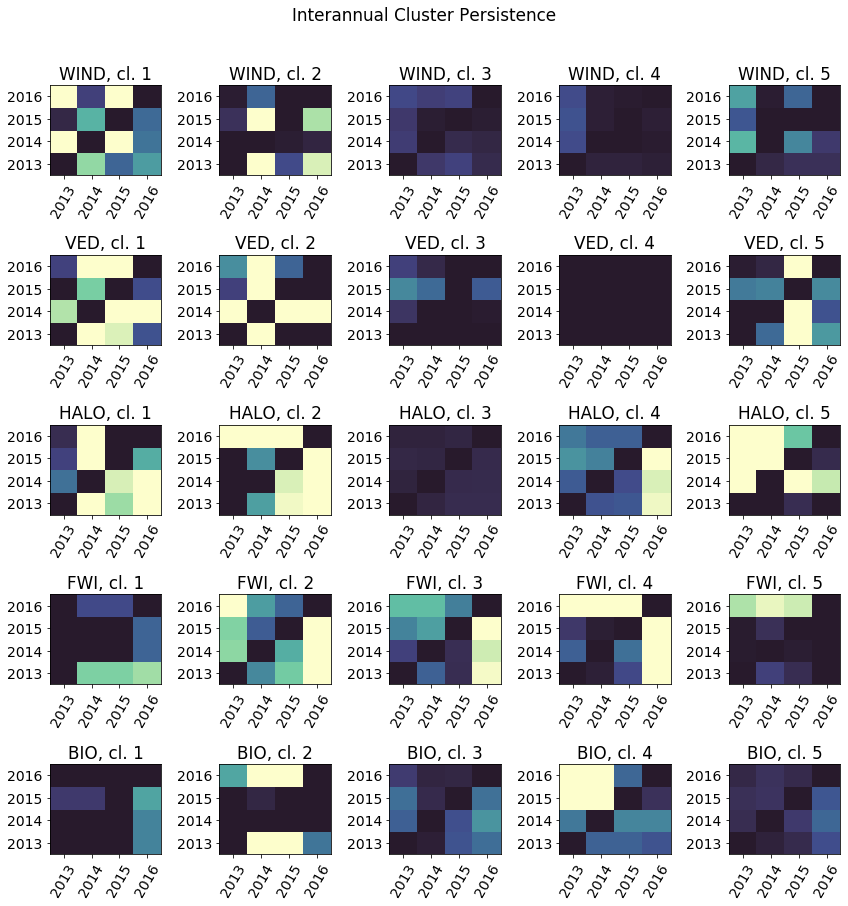

In [13]:
tcmap = cm.cm.deep
plt.rcParams.update({'font.size': 14})
fact = 0.8
fig = plt.figure(figsize=(15*fact, 15*fact))
cmap = tcmap
section_slice = np.arange(2013,2018,1)

    
tgraph = [WIND_overlaps_cl_1,WIND_overlaps_cl_2,WIND_overlaps_cl_3,\
         WIND_overlaps_cl_4,WIND_overlaps_cl_5]; tit = 'WIND'
for i in range(0,5):
    tpl = tgraph[i]
    ax = plt.subplot2grid((5,5), (0,i), colspan=1, rowspan=1) 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.5, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [VED_overlaps_cl_1,VED_overlaps_cl_2,VED_overlaps_cl_3,\
         VED_overlaps_cl_4,VED_overlaps_cl_5]; tit = 'VED'
for i in range(0,5):
    tpl = tgraph[i]
    ax = plt.subplot2grid((5,5), (1,i), colspan=1, rowspan=1) 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.5, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [HALO_overlaps_cl_1,HALO_overlaps_cl_2,HALO_overlaps_cl_3,\
         HALO_overlaps_cl_4,HALO_overlaps_cl_5]; tit = 'HALO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = plt.subplot2grid((5,5), (2,i), colspan=1, rowspan=1) 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.5, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [FWI_overlaps_cl_1,FWI_overlaps_cl_2,FWI_overlaps_cl_3,\
         FWI_overlaps_cl_4,FWI_overlaps_cl_5]; tit = 'FWI'
for i in range(0,5):
    tpl = tgraph[i]
    ax = plt.subplot2grid((5,5), (3,i), colspan=1, rowspan=1) 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.5, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [BIO_overlaps_cl_1,BIO_overlaps_cl_2,BIO_overlaps_cl_3,\
         BIO_overlaps_cl_4,BIO_overlaps_cl_5]; tit = 'BIO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = plt.subplot2grid((5,5), (4,i), colspan=1, rowspan=1) 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.5, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
 


plt.tight_layout()
plt.suptitle('Interannual Cluster Persistence', y = 1.05)


Text(0.5, 1.05, 'Interannual Cluster Persistence')

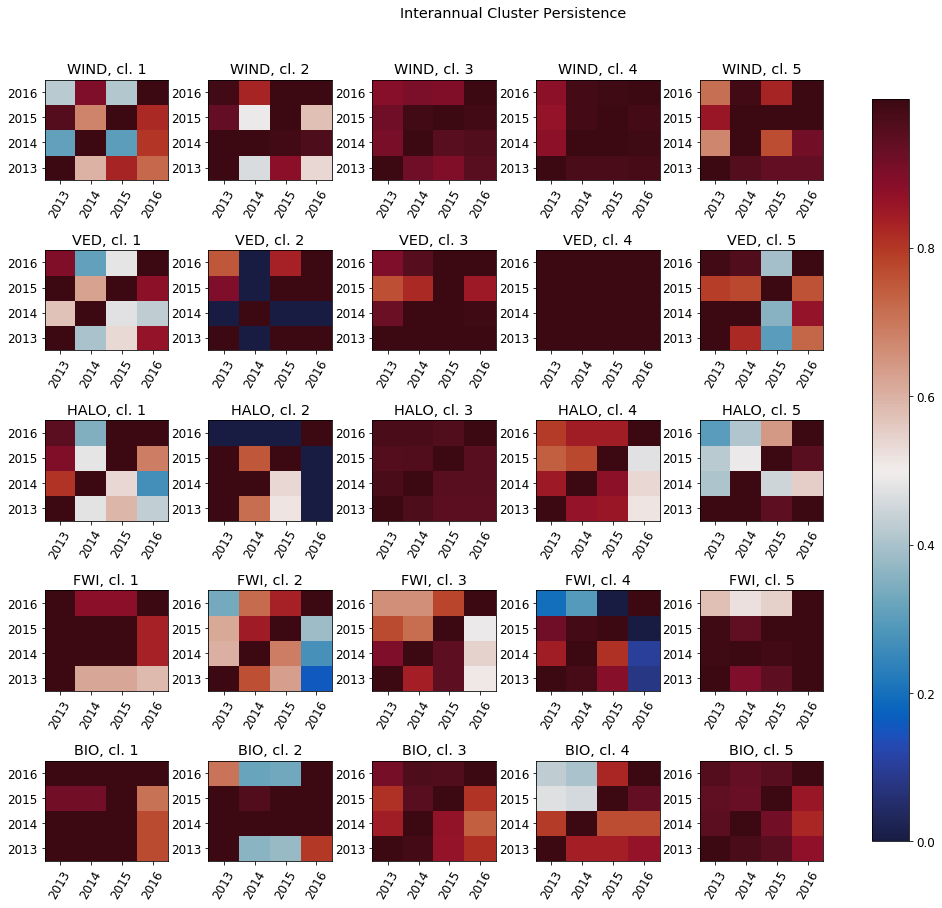

In [18]:
tcmap = cm.cm.balance
plt.rcParams.update({'font.size': 12})
fact = 0.8
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18*fact, 15*fact))
cmap = tcmap
section_slice = np.arange(2013,2018,1)

    
tgraph = [WIND_overlaps_cl_1,WIND_overlaps_cl_2,WIND_overlaps_cl_3,\
         WIND_overlaps_cl_4,WIND_overlaps_cl_5]; tit = 'WIND'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[0,i]
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [VED_overlaps_cl_1,VED_overlaps_cl_2,VED_overlaps_cl_3,\
         VED_overlaps_cl_4,VED_overlaps_cl_5]; tit = 'VED'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[1,i]
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [HALO_overlaps_cl_1,HALO_overlaps_cl_2,HALO_overlaps_cl_3,\
         HALO_overlaps_cl_4,HALO_overlaps_cl_5]; tit = 'HALO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[2,i]
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
    
tgraph = [FWI_overlaps_cl_1,FWI_overlaps_cl_2,FWI_overlaps_cl_3,\
         FWI_overlaps_cl_4,FWI_overlaps_cl_5]; tit = 'FWI'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[3,i] 
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')
tgraph = [BIO_overlaps_cl_1,BIO_overlaps_cl_2,BIO_overlaps_cl_3,\
         BIO_overlaps_cl_4,BIO_overlaps_cl_5]; tit = 'BIO'
for i in range(0,5):
    tpl = tgraph[i]
    ax = axes[4,i]
    tpl[np.isnan(tpl)] = 1
    mesh = ax.pcolormesh(section_slice[:],section_slice[:],tpl, cmap = tcmap, vmin=0.0, vmax=1.0 )
    ax.set_xticks([2013.5,2014.5,2015.5,2016.5]); ax.set_xticklabels(['2013','2014','2015','2016'],rotation='60')
    ax.set_yticks([2013.5,2014.5,2015.5,2016.5]); ax.set_yticklabels(['2013','2014','2015','2016'])
    ax.set_title(f'{tit}, cl. {i+1}')

plt.tight_layout()
cbar = fig.colorbar(mesh, ax=axes.ravel().tolist(), shrink=0.95)

cbar.set_ticks(np.arange(0, 1.0, 0.2))
#cbar.set_ticklabels(['low', 'medium', 'high'])



plt.suptitle('Interannual Cluster Persistence', y = 1.05)


this can be read as "intersection of (y axis and x axis cluster)/ size of y axis cluster"

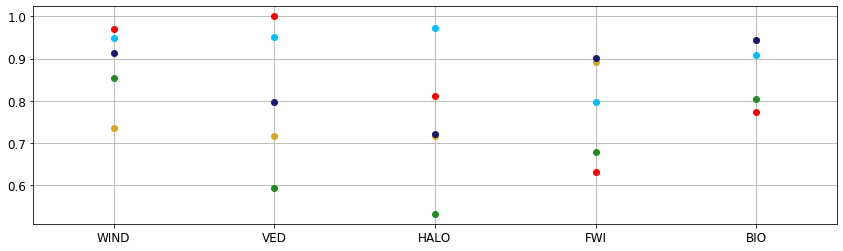

In [15]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18*fact, 5*fact))
   
tgraph = [WIND_overlaps_cl_1,WIND_overlaps_cl_2,WIND_overlaps_cl_3,\
         WIND_overlaps_cl_4,WIND_overlaps_cl_5]; tit = 'WIND'
for c in range(0,5):
    ax.plot(1,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    
tgraph = [VED_overlaps_cl_1,VED_overlaps_cl_2,VED_overlaps_cl_3,\
         VED_overlaps_cl_4,VED_overlaps_cl_5]; tit = 'VED'
for c in range(0,5):
    ax.plot(2,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])

tgraph = [HALO_overlaps_cl_1,HALO_overlaps_cl_2,HALO_overlaps_cl_3,\
         HALO_overlaps_cl_4,HALO_overlaps_cl_5]; tit = 'HALO'
for c in range(0,5):
    ax.plot(3,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])

tgraph = [FWI_overlaps_cl_1,FWI_overlaps_cl_2,FWI_overlaps_cl_3,\
         FWI_overlaps_cl_4,FWI_overlaps_cl_5]; tit = 'FWI'
for c in range(0,5):
    ax.plot(4,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])

tgraph = [BIO_overlaps_cl_1,BIO_overlaps_cl_2,BIO_overlaps_cl_3,\
         BIO_overlaps_cl_4,BIO_overlaps_cl_5]; tit = 'BIO'
for c in range(0,5):
    ax.plot(5,np.nanmean(tgraph[c]),marker = 'o', color = colors[c+1])
    
ax.set_xticks(np.arange(0,6,1))
ax.set_xticklabels(['','WIND','VED','HALO','FWI','BIO'])
ax.set_xlim([0.5,5.5])
ax.grid()